In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

In [2]:
# Path of folder for summarized datasets
dir_path = '..//data//results_summary//'

total_voters_processed = 56962688

#### cand_id assigned (by me) to particular candidates

Admin slate: 35, 26, 22, 25, 34, 7, 36, 50, 24, 6

Duterten: 30, 27, 28, 31, 32, 60, 54, 63, 64, 29

Imee: 20

Villar: 21

Bam: 4

Kiko: 8

In [3]:
### Vote data
nat_df = pd.read_csv(os.path.join(dir_path,'national.csv'))
reg_df = pd.read_csv(os.path.join(dir_path,'regional.csv'))
prv_df = pd.read_csv(os.path.join(dir_path,'provincial.csv'))
cty_df = pd.read_csv(os.path.join(dir_path,'city.csv'))

### Context details
sen_det_df = pd.read_csv(os.path.join(dir_path,'sen_details.csv'))
reg_det_df = pd.read_csv(os.path.join(dir_path,'region_details.csv'))
prv_det_df = pd.read_csv(os.path.join(dir_path,'province_details.csv'))
cty_det_df = pd.read_csv(os.path.join(dir_path,'city_details.csv'))

In [4]:
# Computation of vote percentage (100% * vote count/total voters processed)
nat_df['perc_votes'] = 100*nat_df['vote_count']/total_voters_processed
nat_df24 = nat_df.sort_values("vote_count",ascending=False).head(24).reset_index(drop=True)

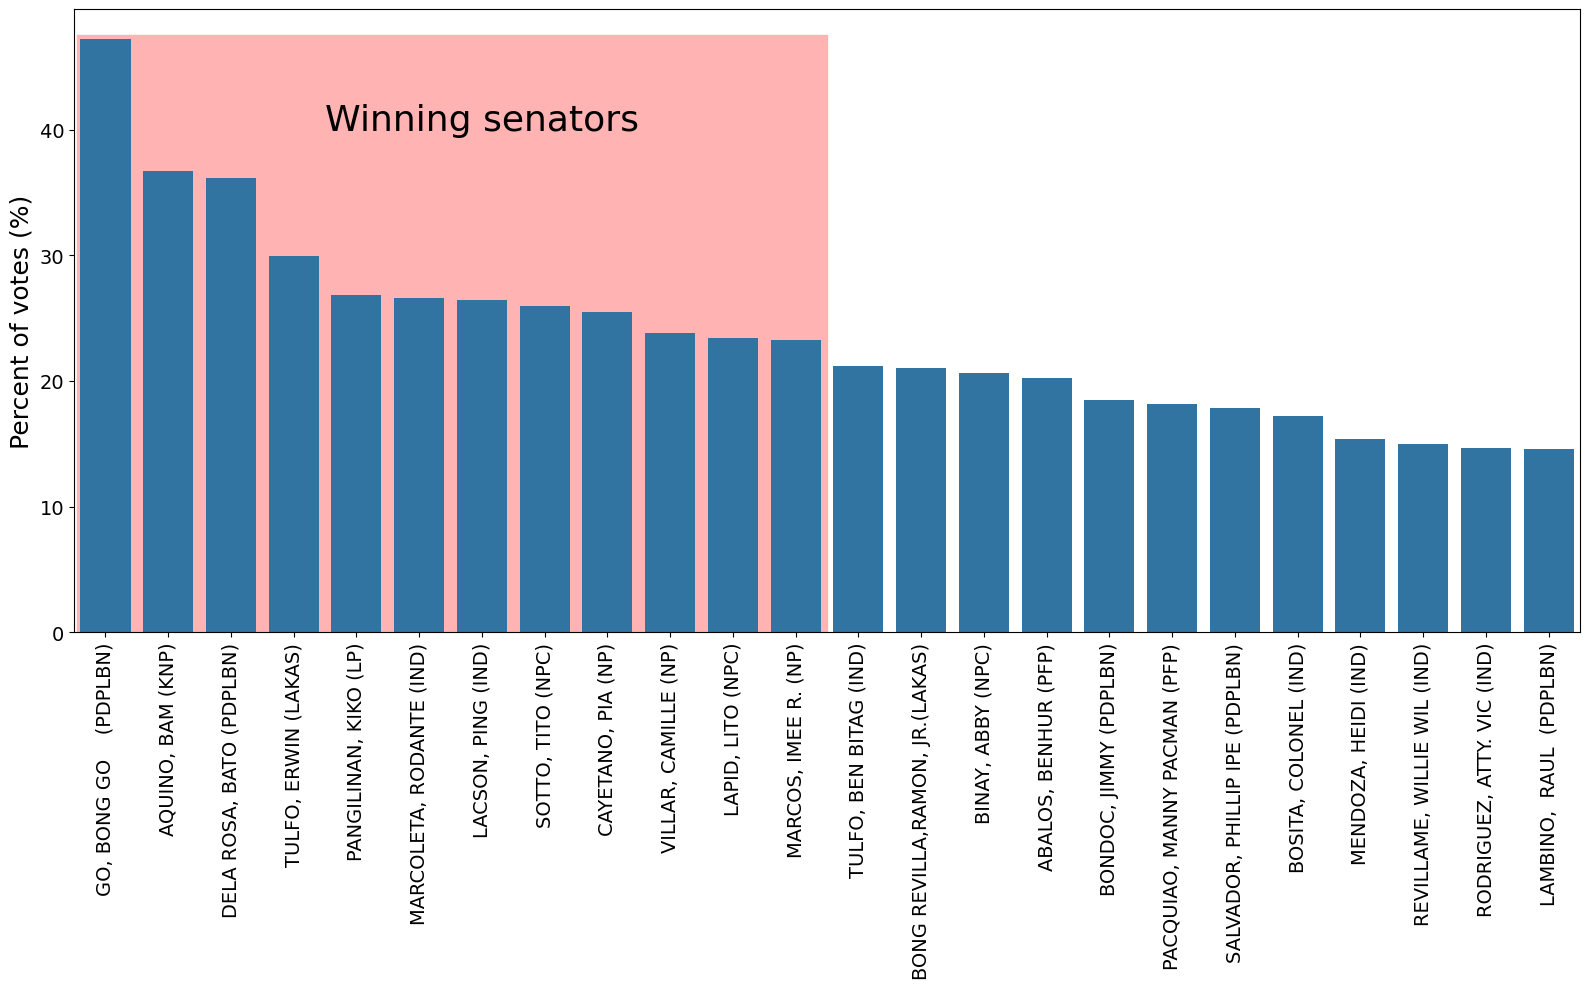

In [5]:
###  Plotting of vote percentage for the Top 24 senatoriables  ###
fig,ax = plt.subplots(figsize=(16,10))

# Plot of vote percentages and winning senators' background
ax.fill_between([-0.45,11.5],[47.5,47.5],color=(1,0.7,0.7,1))
sns.barplot(x='name',y='perc_votes',data=nat_df24,ax=ax)

# Formatting
ax.tick_params(axis='x', labelrotation=90, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel(None)
ax.set_ylabel("Percent of votes (%)",fontsize=18)
ax.annotate('Winning senators',[6,40], ha='center',fontsize=26)
ax.set_xlim(-0.5,23.5)
fig.tight_layout()

fig.savefig("..//plots//percent_of_votes.png")
plt.show()

In [6]:
### Table merges between voter and removal of overseas absentee votes (OAV) ###
prv_wdet_temp = prv_df.merge(prv_det_df[['prv_id','total_voters_processed','prv_name','reg_name']], on='prv_id')
prv_wdet = prv_wdet_temp.merge(sen_det_df[['cand_id','name']], on='cand_id')
prv_wdet['perc_votes'] = 100*prv_wdet['vote_count']/prv_wdet['total_voters_processed']
prv_wdet = prv_wdet.loc[prv_wdet["reg_name"]!="OAV"].reset_index(drop=True)

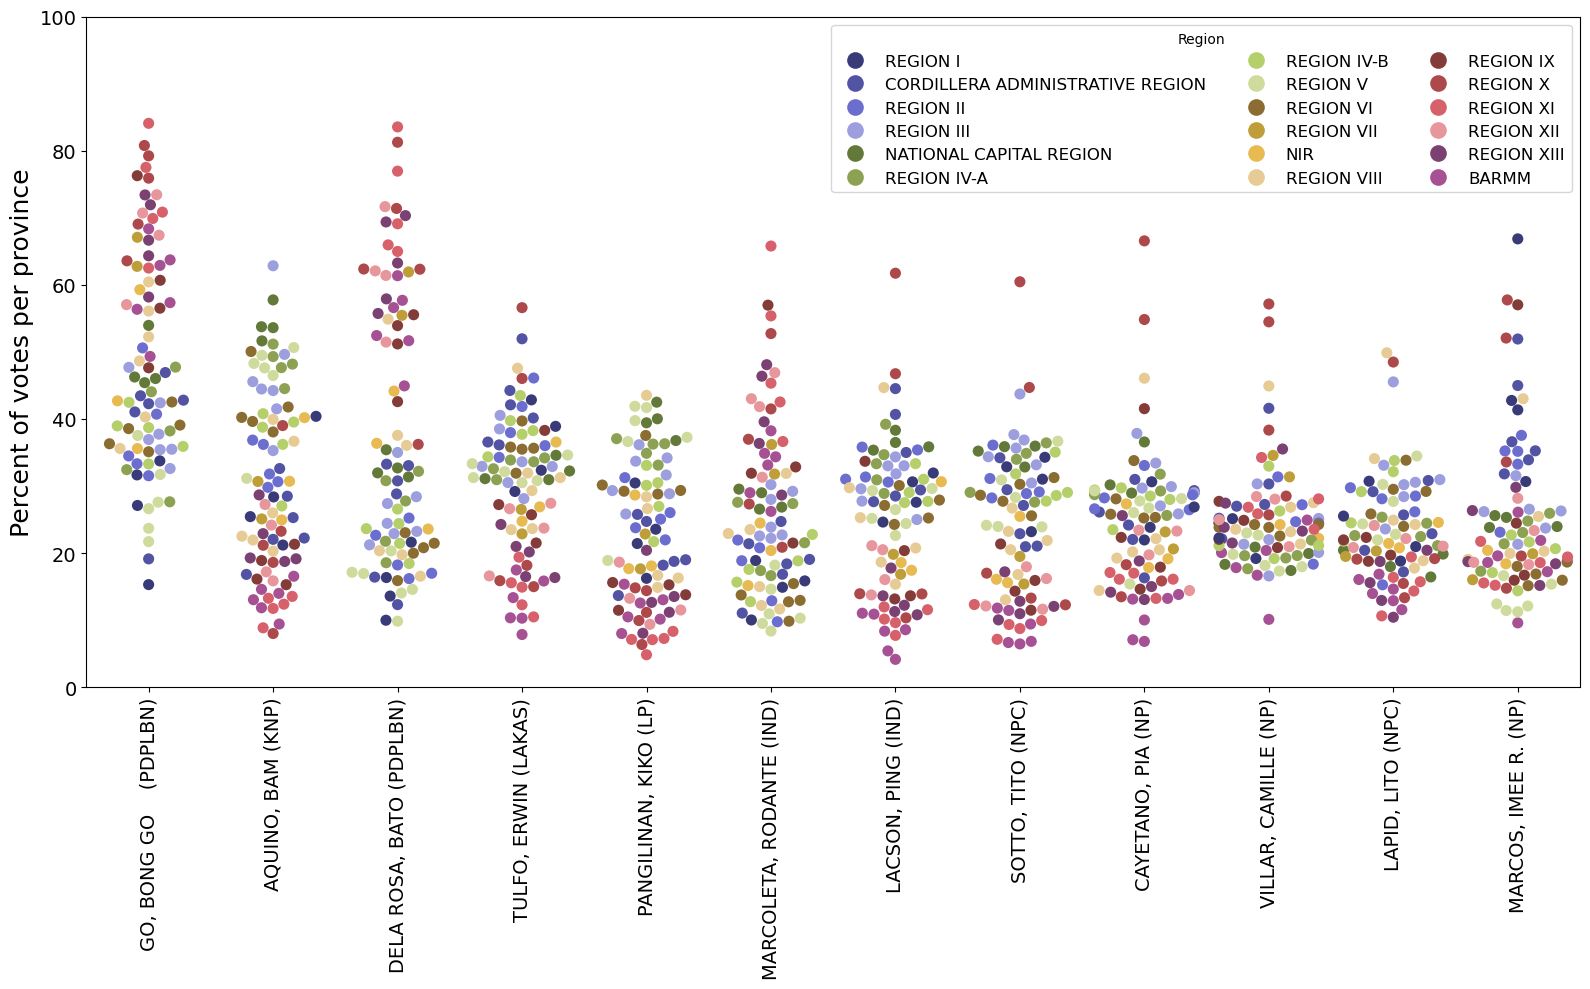

In [7]:
### SWARM PLOT OF PROVINCIAL VOTE PERCENTAGES FOR TOP 12 ###
hue_order = ['REGION I','CORDILLERA ADMINISTRATIVE REGION','REGION II','REGION III','NATIONAL CAPITAL REGION','REGION IV-A','REGION IV-B','REGION V',
            'REGION VI','REGION VII','NIR','REGION VIII','REGION IX','REGION X','REGION XI','REGION XII','REGION XIII','BARMM']
fig,ax = plt.subplots(figsize=(16,10))

# Plotting
sw = sns.swarmplot(x='name',y='perc_votes',data=prv_wdet,ax=ax,hue='reg_name',order=nat_df24['name'].values[:12],hue_order=hue_order,palette='tab20b',
                  size=8)

# Formatting
sns.move_legend(sw,loc='best',ncol=3,title='Region',fontsize=12,markerscale=1.5)
ax.tick_params(axis='x', labelrotation=90, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel(None)
ax.set_ylabel("Percent of votes per province",fontsize=18)
ax.set_ylim(0,100)
fig.tight_layout()

fig.savefig("..//plots//top12_per_province.png")
plt.show()

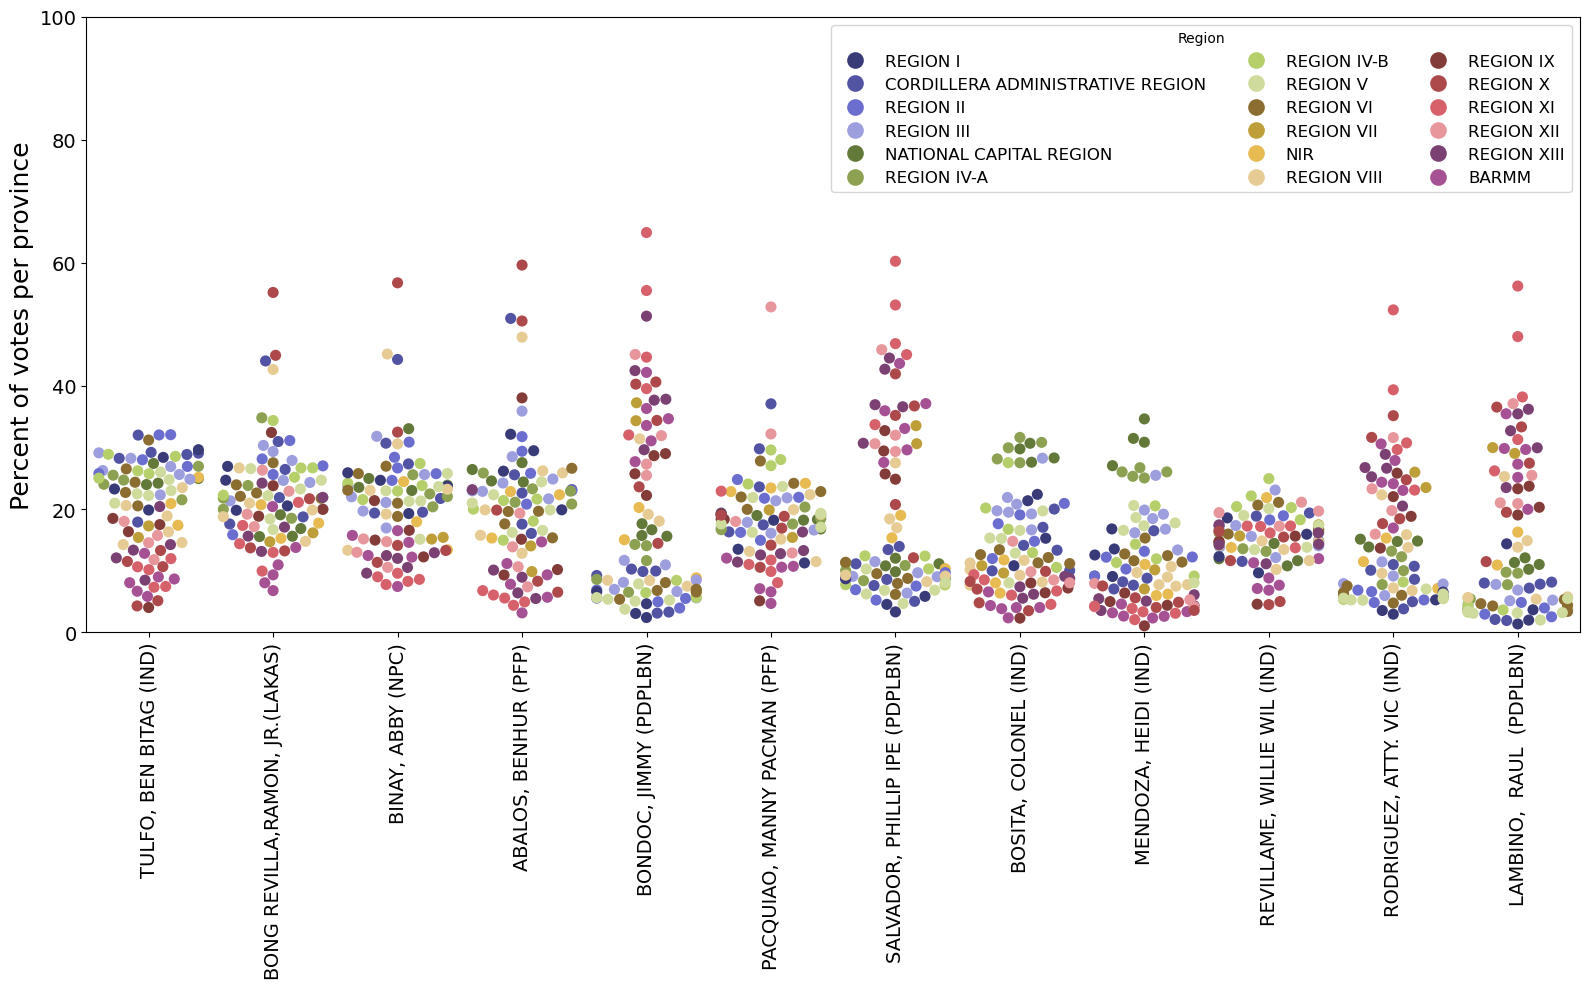

In [8]:
### SWARM PLOT OF PROVINCIAL VOTE PERCENTAGES FOR 13TH-24TH SENATORIABLES ###
hue_order = ['REGION I','CORDILLERA ADMINISTRATIVE REGION','REGION II','REGION III','NATIONAL CAPITAL REGION','REGION IV-A','REGION IV-B','REGION V',
            'REGION VI','REGION VII','NIR','REGION VIII','REGION IX','REGION X','REGION XI','REGION XII','REGION XIII','BARMM']
fig,ax = plt.subplots(figsize=(16,10))

# Plotting
sw = sns.swarmplot(x='name',y='perc_votes',data=prv_wdet,ax=ax,hue='reg_name',order=nat_df24['name'].values[12:],hue_order=hue_order,palette='tab20b',
                  size=8)

# Formatting
sns.move_legend(sw,loc='best',ncol=3,title='Region',fontsize=12,markerscale=1.5)
ax.tick_params(axis='x', labelrotation=90, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel(None)
ax.set_ylabel("Percent of votes per province",fontsize=18)
ax.set_ylim(0,100)
fig.tight_layout()

fig.savefig("..//plots//next12_per_province.png")
plt.show()

### Quick view of provinces with highest and lowest vote percentages for particular senatoriables

In [9]:
cand_ids = [4, 8]
print("HIGHEST VOTE PERCENTAGES OF BAM-KIKO\n")
for senid in cand_ids:
    print(sen_det_df.loc[sen_det_df["cand_id"]==senid,"name"].values[0])
    print(prv_wdet.loc[prv_wdet['cand_id']==senid,['prv_name','vote_count','perc_votes']].sort_values("perc_votes",ascending=False).head(3).to_string(index=False,justify='right'))
    print("\n")

print("LOWEST VOTE PERCENTAGES OF BAM-KIKO\n")
for senid in cand_ids:
    print(sen_det_df.loc[sen_det_df["cand_id"]==senid,"name"].values[0])
    print(prv_wdet.loc[prv_wdet['cand_id']==senid,['prv_name','vote_count','perc_votes']].sort_values("perc_votes",ascending=False).tail(3).to_string(index=False,justify='right'))
    print("\n")

HIGHEST VOTE PERCENTAGES OF BAM-KIKO

AQUINO, BAM (KNP)
                                 prv_name  vote_count  perc_votes
                                   TARLAC      519376   62.832429
NATIONAL CAPITAL REGION - SECOND DISTRICT     1174657   57.743275
         NATIONAL CAPITAL REGION - MANILA      498146   53.743984


PANGILINAN, KIKO (LP)
                                 prv_name  vote_count  perc_votes
                                    SAMAR      218992   43.516500
NATIONAL CAPITAL REGION - SECOND DISTRICT      864382   42.490912
                                    ALBAY      351890   41.882542


LOWEST VOTE PERCENTAGES OF BAM-KIKO

AQUINO, BAM (KNP)
        prv_name  vote_count  perc_votes
       TAWI-TAWI       18318    9.409722
DAVAO OCCIDENTAL       13394    8.848166
        CAMIGUIN        4781    7.996053


PANGILINAN, KIKO (LP)
          prv_name  vote_count  perc_votes
     DAVAO DEL SUR       82073    7.085178
MISAMIS OCCIDENTAL       23195    6.357024
  DAVAO OCCIDENTAL

In [10]:
cand_ids = [20, 21]
print("HIGHEST VOTE PERCENTAGES OF CAMILLE-IMEE\n")
for senid in cand_ids:
    print(sen_det_df.loc[sen_det_df["cand_id"]==senid,"name"].values[0])
    print(prv_wdet.loc[prv_wdet['cand_id']==senid,['prv_name','vote_count','perc_votes']].sort_values("perc_votes",ascending=False).head(3).to_string(index=False,justify='right'))
    print("\n")

print("LOWEST VOTE PERCENTAGES OF CAMILLE-IMEE\n")
for senid in cand_ids:
    print(sen_det_df.loc[sen_det_df["cand_id"]==senid,"name"].values[0])
    print(prv_wdet.loc[prv_wdet['cand_id']==senid,['prv_name','vote_count','perc_votes']].sort_values("perc_votes",ascending=False).tail(3).to_string(index=False,justify='right'))
    print("\n")

HIGHEST VOTE PERCENTAGES OF CAMILLE-IMEE

MARCOS, IMEE R. (NP)
          prv_name  vote_count  perc_votes
      ILOCOS NORTE      259320   66.842459
MISAMIS OCCIDENTAL      210668   57.737508
              SULU      202882   57.010465


VILLAR, CAMILLE (NP)
          prv_name  vote_count  perc_votes
MISAMIS OCCIDENTAL      208465   57.133735
          CAMIGUIN       32568   54.468825
             SAMAR      226006   44.910271


LOWEST VOTE PERCENTAGES OF CAMILLE-IMEE

MARCOS, IMEE R. (NP)
               prv_name  vote_count  perc_votes
               SORSOGON       54313   11.426353
                  ALBAY       94493   11.246716
SPECIAL GEOGRAPHIC AREA        7714    9.583799


VILLAR, CAMILLE (NP)
               prv_name  vote_count  perc_votes
  MAGUINDANAO DEL NORTE       57042   16.690807
                BULACAN      306230   16.579868
SPECIAL GEOGRAPHIC AREA        8135   10.106846




In [11]:
cand_ids = [35, 26, 22, 25, 34, 7, 36, 50, 24, 6]
print("HIGHEST VOTE PERCENTAGES OF ADMIN SLATE\n")
for senid in cand_ids:
    print(sen_det_df.loc[sen_det_df["cand_id"]==senid,"name"].values[0])
    print(prv_wdet.loc[prv_wdet['cand_id']==senid,['prv_name','vote_count','perc_votes']].sort_values("perc_votes",ascending=False).head(3).to_string(index=False,justify='right'))
    print("\n")

print("LOWEST VOTE PERCENTAGES OF ADMIN SLATE\n")
for senid in cand_ids:
    print(sen_det_df.loc[sen_det_df["cand_id"]==senid,"name"].values[0])
    print(prv_wdet.loc[prv_wdet['cand_id']==senid,['prv_name','vote_count','perc_votes']].sort_values("perc_votes",ascending=False).tail(3).to_string(index=False,justify='right'))
    print("\n")

HIGHEST VOTE PERCENTAGES OF ADMIN SLATE

ABALOS, BENHUR (PFP)
          prv_name  vote_count  perc_votes
          CAMIGUIN       35651   59.625033
              ABRA       87755   50.959908
MISAMIS OCCIDENTAL      184408   50.540464


BINAY, ABBY (NPC)
prv_name  vote_count  perc_votes
CAMIGUIN       33926   56.740032
   SAMAR      227304   45.168200
    ABRA       76279   44.295719


CAYETANO, PIA (NP)
          prv_name  vote_count  perc_votes
          CAMIGUIN       39787   66.542347
MISAMIS OCCIDENTAL      200022   54.819772
             SAMAR      231797   46.061017


LAPID, LITO (NPC)
          prv_name  vote_count  perc_votes
             SAMAR      250883   49.853648
MISAMIS OCCIDENTAL      176872   48.475082
          PAMPANGA      645342   45.516497


TOLENTINO, FRANCIS TOL (PFP)
          prv_name  vote_count  perc_votes
          CAMIGUIN       32577   54.483877
MISAMIS OCCIDENTAL      173293   47.494190
             SAMAR      172746   34.326831


BONG REVILLA,RAMON, JR.(

In [12]:
cand_ids = [30, 27, 28, 31, 32, 60, 54, 63, 64, 29]
print("HIGHEST VOTE PERCENTAGES OF DUTERTEN\n")
for senid in cand_ids:
    print(sen_det_df.loc[sen_det_df["cand_id"]==senid,"name"].values[0])
    print(prv_wdet.loc[prv_wdet['cand_id']==senid,['prv_name','vote_count','perc_votes']].sort_values("perc_votes",ascending=False).head(3).to_string(index=False,justify='right'))
    print("\n")

print("LOWEST VOTE PERCENTAGES OF DUTERTEN\n")
for senid in cand_ids:
    print(sen_det_df.loc[sen_det_df["cand_id"]==senid,"name"].values[0])
    print(prv_wdet.loc[prv_wdet['cand_id']==senid,['prv_name','vote_count','perc_votes']].sort_values("perc_votes",ascending=False).tail(3).to_string(index=False,justify='right'))
    print("\n")

HIGHEST VOTE PERCENTAGES OF DUTERTEN

BONDOC, JIMMY (PDPLBN)
        prv_name  vote_count  perc_votes
   DAVAO DEL SUR      751876   64.907767
 DAVAO DEL NORTE      333811   55.489046
AGUSAN DEL NORTE      206992   51.327372


DELA ROSA, BATO (PDPLBN)
       prv_name  vote_count  perc_votes
  DAVAO DEL SUR      967654   83.535398
       CAMIGUIN       48581   81.250000
DAVAO DEL NORTE      462869   76.942219


GO, BONG GO    (PDPLBN)
          prv_name  vote_count  perc_votes
     DAVAO DEL SUR      973846   84.069939
          CAMIGUIN       48291   80.764985
MISAMIS OCCIDENTAL      289062   79.222851


HINLO, JAYVEE (PDPLBN)
       prv_name  vote_count  perc_votes
  DAVAO DEL SUR      641027   55.338422
DAVAO DEL NORTE      276911   46.030619
   DAVAO DE ORO      180544   36.798477


LAMBINO,  RAUL  (PDPLBN)
       prv_name  vote_count  perc_votes
  DAVAO DEL SUR      651231   56.219310
DAVAO DEL NORTE      288812   48.008910
   DAVAO DE ORO      187420   38.199943


MARCOLETA, RODAN

### Swarm plots for specific senators

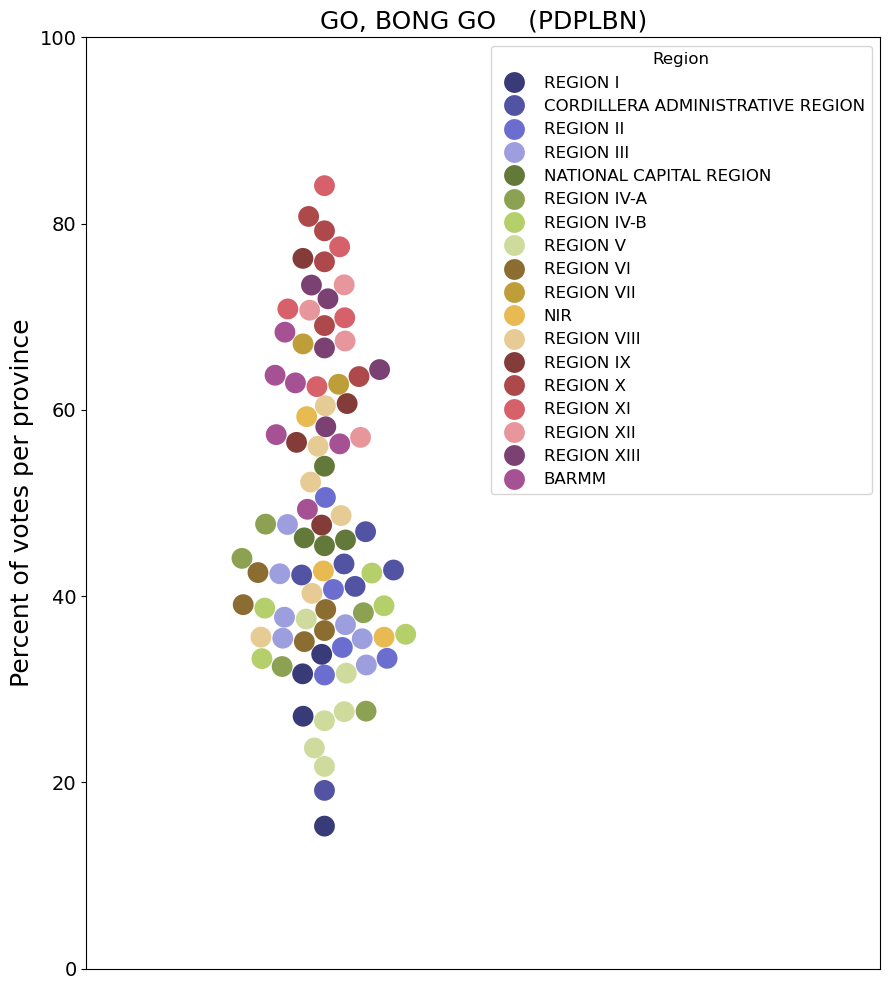

In [13]:
cand_id = 28
hue_order = ['REGION I','CORDILLERA ADMINISTRATIVE REGION','REGION II','REGION III','NATIONAL CAPITAL REGION','REGION IV-A','REGION IV-B','REGION V',
            'REGION VI','REGION VII','NIR','REGION VIII','REGION IX','REGION X','REGION XI','REGION XII','REGION XIII','BARMM']
fig,ax = plt.subplots(figsize=(15,10))

sw = sns.swarmplot(x='name',y='perc_votes',data=prv_wdet.loc[prv_wdet['cand_id']==cand_id],ax=ax,hue='reg_name',hue_order=hue_order,palette='tab20b',
                  size=15)

sns.move_legend(sw,loc='best',ncol=1,title='Region',fontsize=12,title_fontsize=12,markerscale=1)
ax.set_xticks([])
ax.set_title(prv_wdet.loc[prv_wdet['cand_id']==cand_id,'name'].unique()[0],fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel(None)
ax.set_ylabel("Percent of votes per province",fontsize=18)
ax.set_ylim(0,100)
ax.set_xlim(-0.3,0.7)
fig.tight_layout(rect=[0.2,0,0.8,1])

fig.savefig("..//plots//results_bong_go.png")
plt.show()

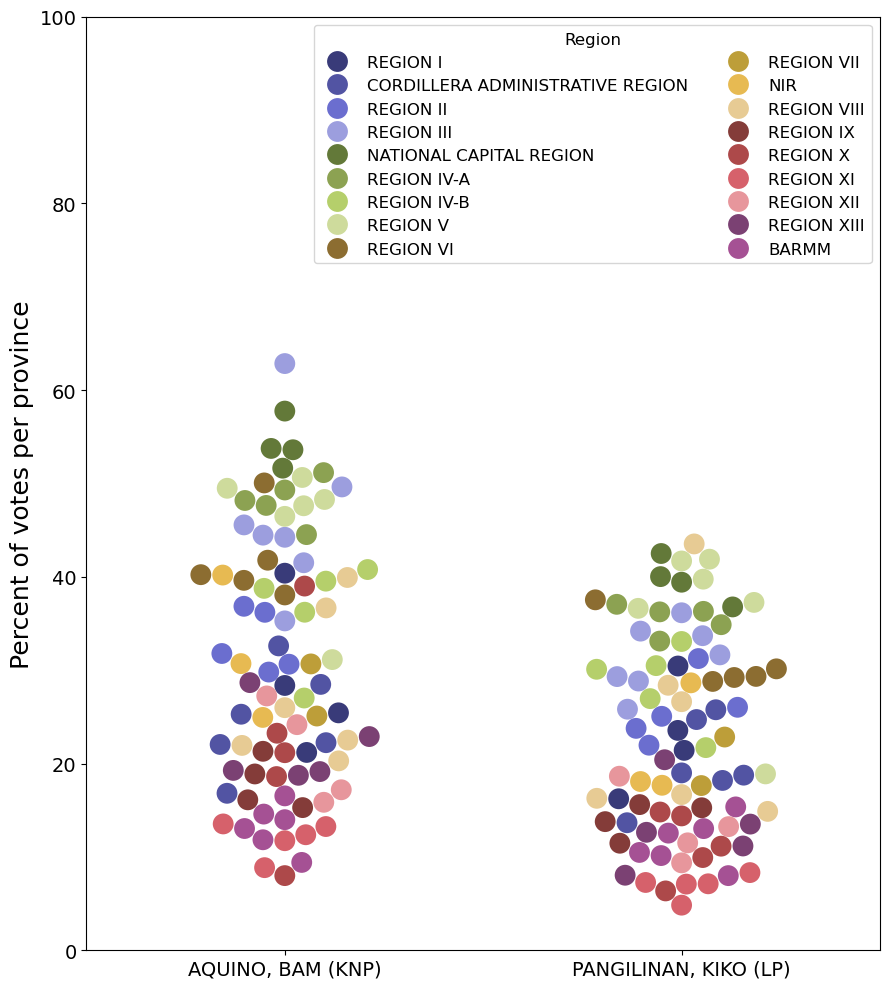

In [14]:
cand_ids = [4,8]
hue_order = ['REGION I','CORDILLERA ADMINISTRATIVE REGION','REGION II','REGION III','NATIONAL CAPITAL REGION','REGION IV-A','REGION IV-B','REGION V',
            'REGION VI','REGION VII','NIR','REGION VIII','REGION IX','REGION X','REGION XI','REGION XII','REGION XIII','BARMM']
fig,ax = plt.subplots(figsize=(15,10))

sw = sns.swarmplot(x='name',y='perc_votes',data=prv_wdet.loc[prv_wdet['cand_id'].isin(cand_ids)],ax=ax,hue='reg_name',hue_order=hue_order,palette='tab20b',
                  size=15)

sns.move_legend(sw,loc='best',ncol=2,title='Region',fontsize=12,title_fontsize=12,markerscale=1)
ax.tick_params(axis='x', labelrotation=0, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel(None)
ax.set_ylabel("Percent of votes per province",fontsize=18)
ax.set_ylim(0,100)
fig.tight_layout(rect=[0.2,0,0.8,1])

fig.savefig("..//plots//results_bam_kiko.png")
plt.show()

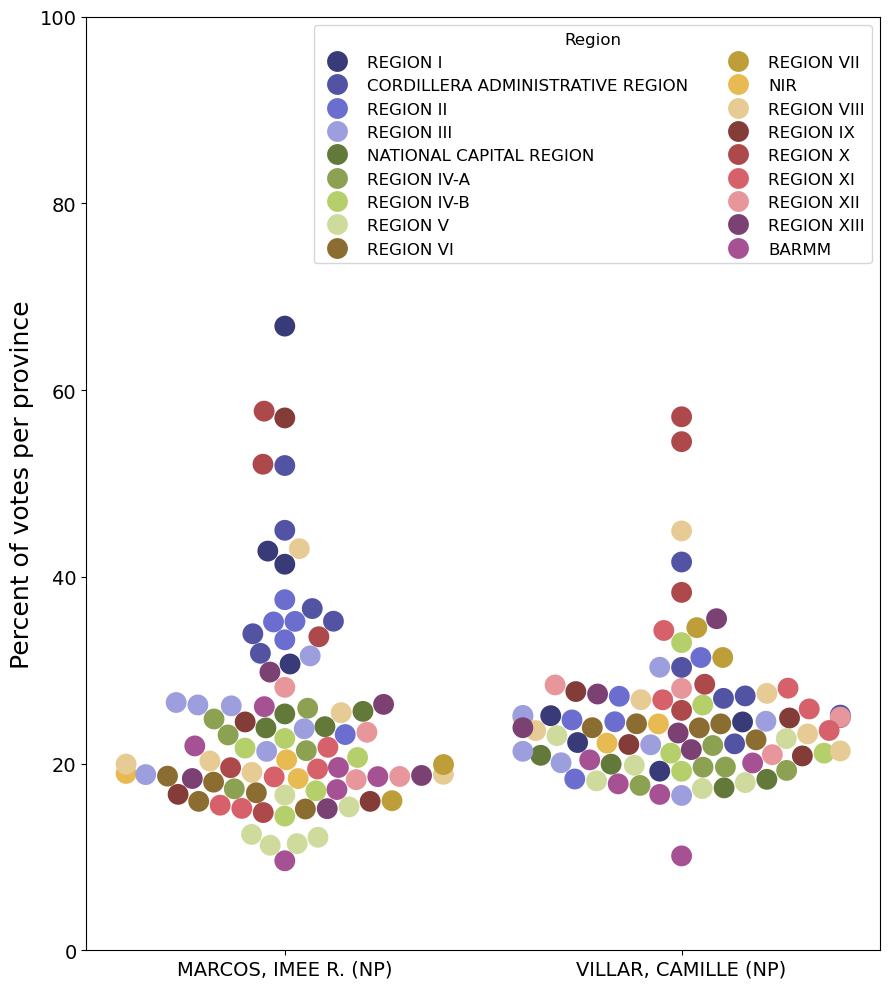

In [15]:
cand_ids = [21,20]
hue_order = ['REGION I','CORDILLERA ADMINISTRATIVE REGION','REGION II','REGION III','NATIONAL CAPITAL REGION','REGION IV-A','REGION IV-B','REGION V',
            'REGION VI','REGION VII','NIR','REGION VIII','REGION IX','REGION X','REGION XI','REGION XII','REGION XIII','BARMM']
fig,ax = plt.subplots(figsize=(15,10))

sw = sns.swarmplot(x='name',y='perc_votes',data=prv_wdet.loc[prv_wdet['cand_id'].isin(cand_ids)],ax=ax,hue='reg_name',hue_order=hue_order,palette='tab20b',
                  size=15)

sns.move_legend(sw,loc='best',ncol=2,title='Region',fontsize=12,title_fontsize=12,markerscale=1)
ax.tick_params(axis='x', labelrotation=0, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel(None)
ax.set_ylabel("Percent of votes per province",fontsize=18)
ax.set_ylim(0,100)
fig.tight_layout(rect=[0.2,0,0.8,1])

fig.savefig("..//plots//results_cam_imee.png")
plt.show()

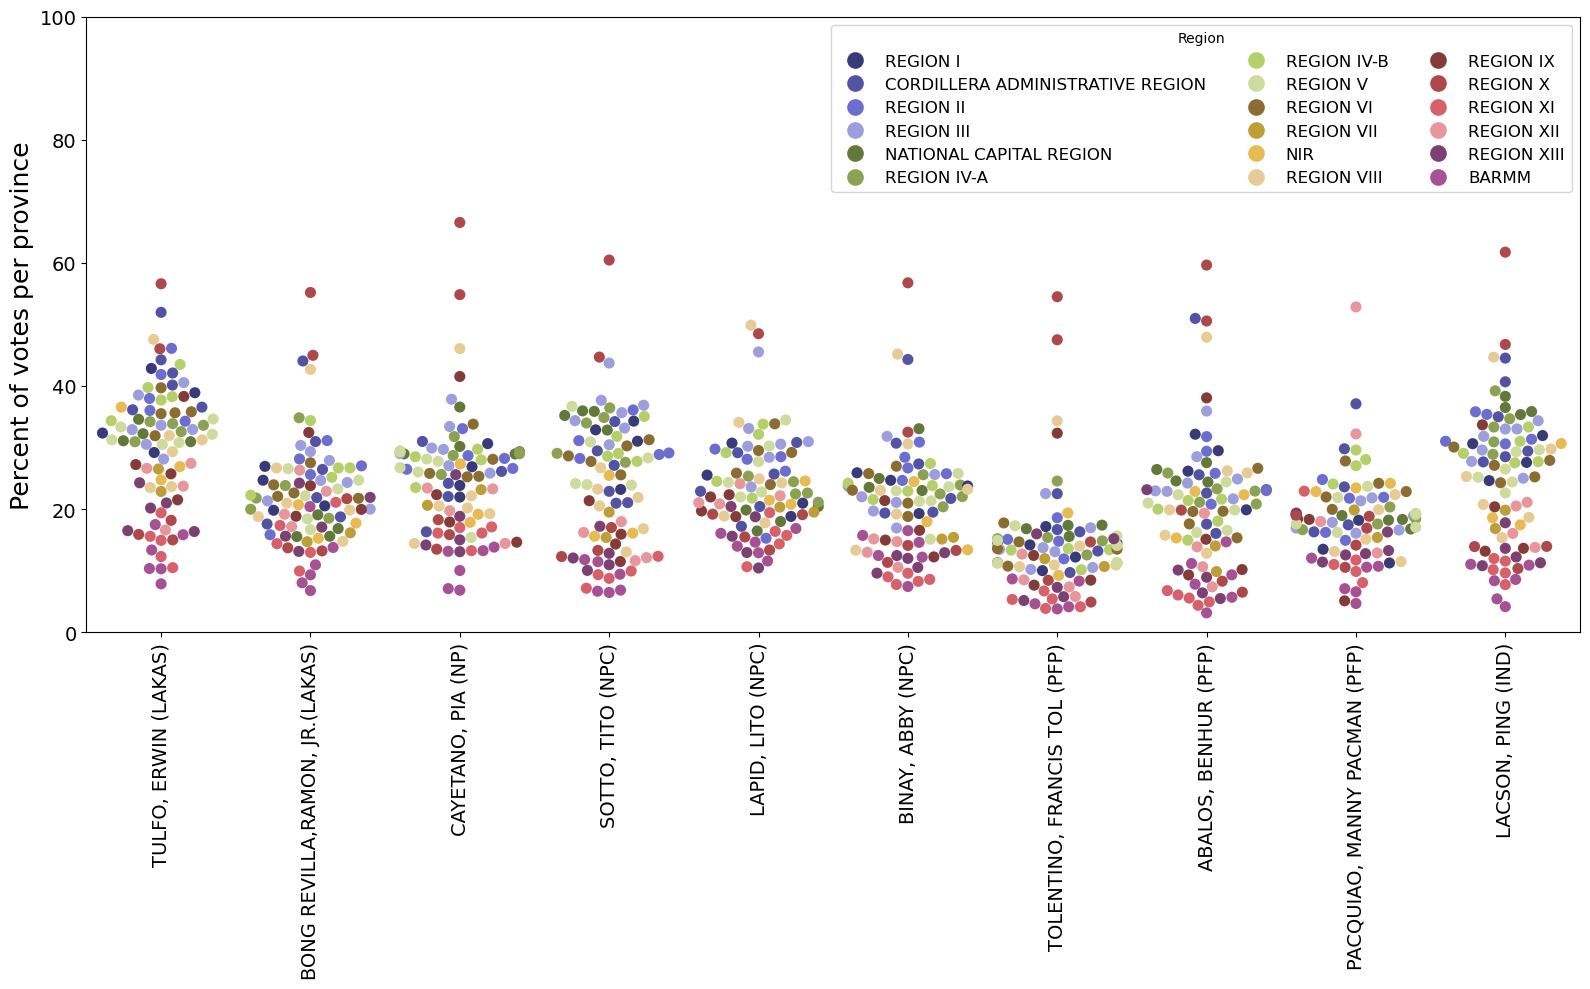

In [16]:
cand_ids = [35, 26, 22, 25, 34, 7, 36, 50, 24, 6]
hue_order = ['REGION I','CORDILLERA ADMINISTRATIVE REGION','REGION II','REGION III','NATIONAL CAPITAL REGION','REGION IV-A','REGION IV-B','REGION V',
            'REGION VI','REGION VII','NIR','REGION VIII','REGION IX','REGION X','REGION XI','REGION XII','REGION XIII','BARMM']
fig,ax = plt.subplots(figsize=(16,10))

sw = sns.swarmplot(x='name',y='perc_votes',data=prv_wdet.loc[prv_wdet['cand_id'].isin(cand_ids)],ax=ax,hue='reg_name',hue_order=hue_order,palette='tab20b',
                  size=8)

sns.move_legend(sw,loc='best',ncol=3,title='Region',fontsize=12,markerscale=1.5)
ax.tick_params(axis='x', labelrotation=90, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel(None)
ax.set_ylabel("Percent of votes per province",fontsize=18)
ax.set_ylim(0,100)
fig.tight_layout()

fig.savefig("..//plots//results_admin.png")
plt.show()

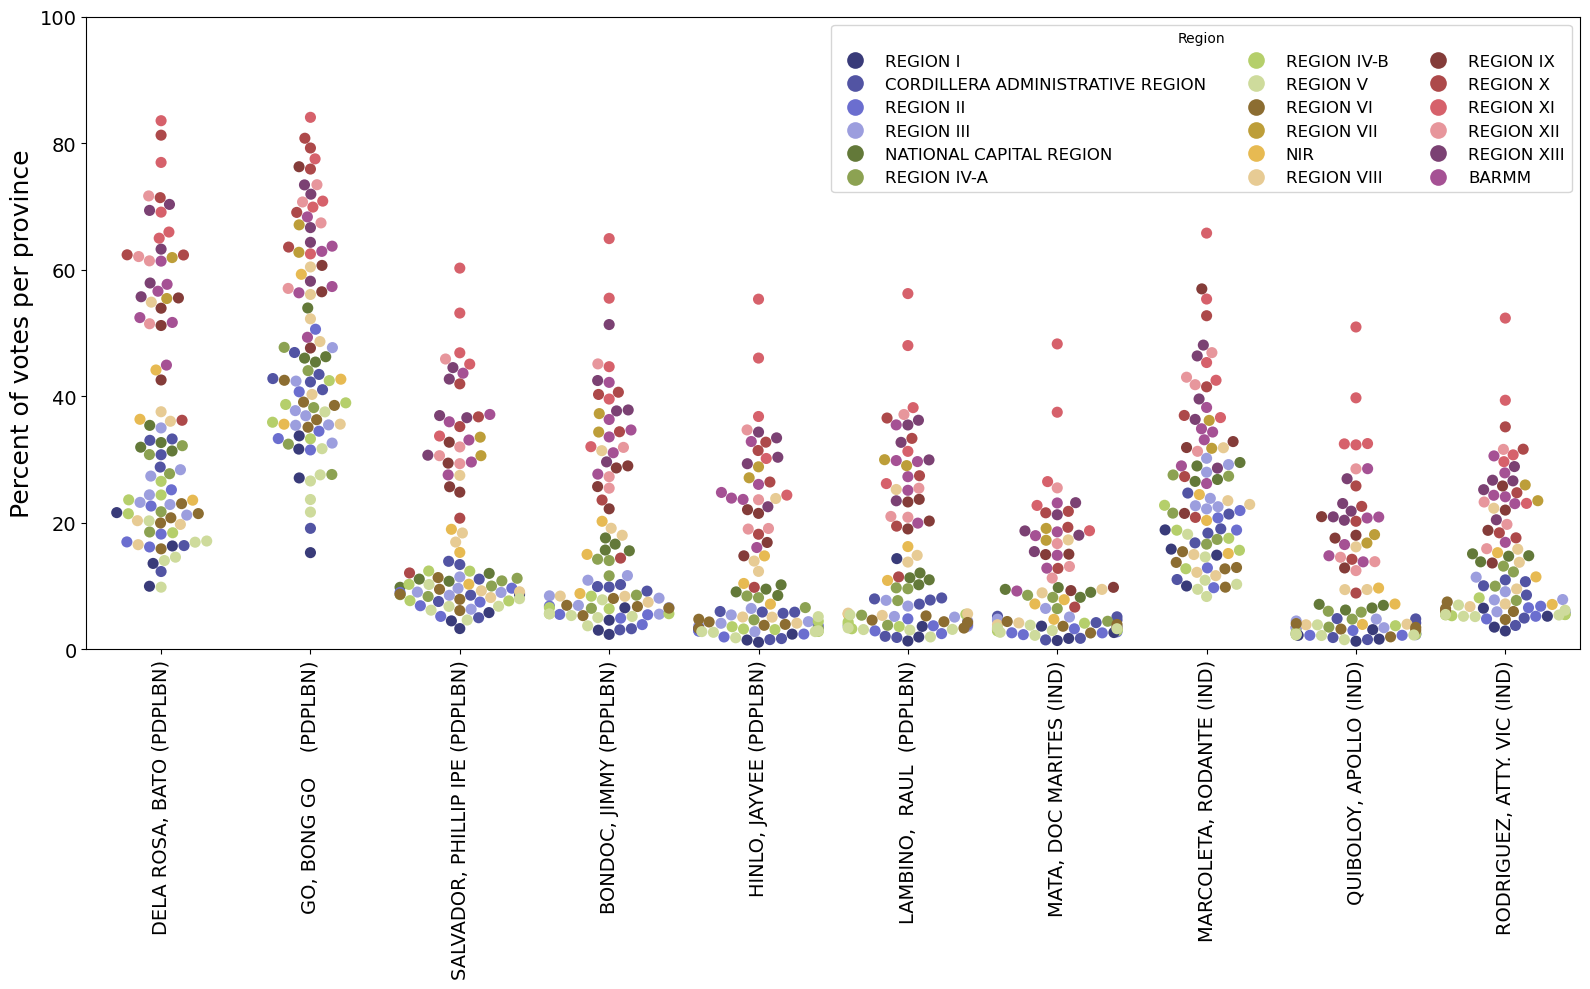

In [17]:
cand_ids = [30, 27, 28, 31, 32, 60, 54, 63, 64, 29]
hue_order = ['REGION I','CORDILLERA ADMINISTRATIVE REGION','REGION II','REGION III','NATIONAL CAPITAL REGION','REGION IV-A','REGION IV-B','REGION V',
            'REGION VI','REGION VII','NIR','REGION VIII','REGION IX','REGION X','REGION XI','REGION XII','REGION XIII','BARMM']
fig,ax = plt.subplots(figsize=(16,10))

sw = sns.swarmplot(x='name',y='perc_votes',data=prv_wdet.loc[prv_wdet['cand_id'].isin(cand_ids)],ax=ax,hue='reg_name',hue_order=hue_order,palette='tab20b',
                  size=8)

sns.move_legend(sw,loc='best',ncol=3,title='Region',fontsize=12,markerscale=1.5)
ax.tick_params(axis='x', labelrotation=90, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel(None)
ax.set_ylabel("Percent of votes per province",fontsize=18)
ax.set_ylim(0,100)
fig.tight_layout()

fig.savefig("..//plots//results_duter10.png")
plt.show()